In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.utils import data
from astropy.io import fits
import  aplpy

In [50]:
OAr = np.zeros((21,36))
OAb = np.zeros((21,36))
X_OAr = np.zeros((21,36))
X_OAb = np.zeros((21,36))


A  = np.zeros((21,2))
Mu = np.zeros((21,2))
Sig= np.zeros((21,2))
C  = np.zeros((21,2))
Mu_err = np.zeros((21,2))
Sig_err = np.zeros((21,2))

# New HOPS-10

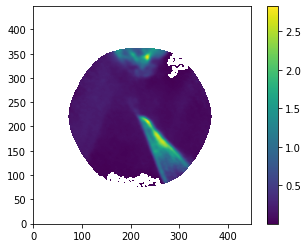

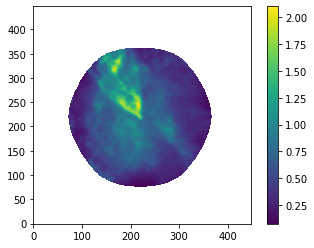

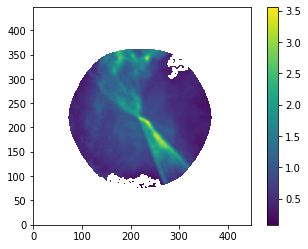

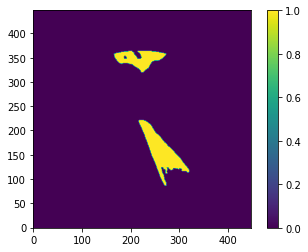

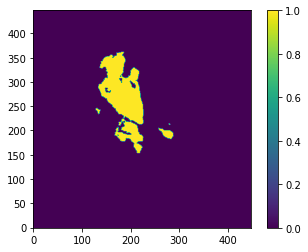

In [51]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS10_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS10_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.8,1.0,0.0 )
maskr = np.where(image_datar > 0.9,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [52]:
image_header = fits.getheader(image_file_r, ext=0)
#image_header#['CRPIX1']

225.0
225.0
(448, 448)


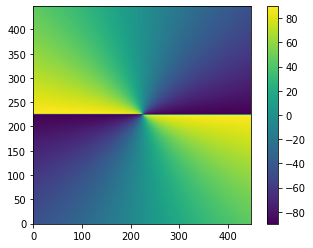

In [53]:
print(image_header['CRPIX1'])
print(image_header['CRPIX2'])

PA_grid = np.full((image_header['NAXIS1'],image_header['NAXIS2']),0.0)
print(PA_grid.shape)

for i in range(PA_grid.shape[0]):
    for j in range(PA_grid.shape[1]):
        x = i-image_header['CRPIX1']
        y = j-image_header['CRPIX2']
        if x ==0:
            #pass
            PA_grid[i][j] = -np.arctan(np.inf)/np.pi*180
        else:
            PA_grid[i][j] = -np.arctan(y/x)/np.pi*180
        
plt.imshow(PA_grid,origin='lower')
plt.colorbar()
plt.show()

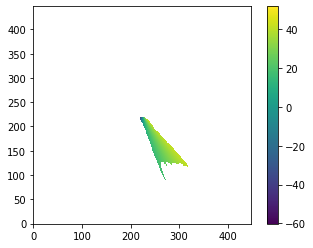

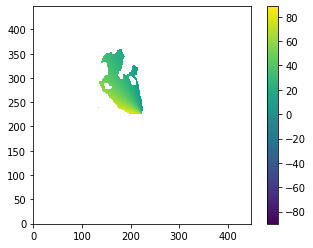

In [54]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[250:,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[:225,:] =np.nan
plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

In [55]:
#print(len(binrange))

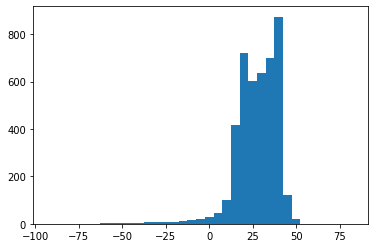

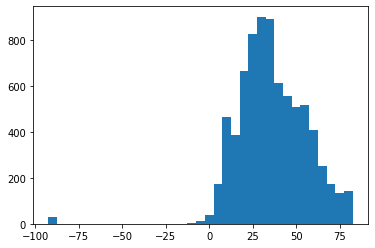

[  0.   0.   0.   0.   0.   0.   2.   3.   4.   4.   5.   6.   6.   9.
   9.  12.  14.  20.  29.  44. 102. 418. 720. 603. 638. 701. 874. 121.
  19.   0.   0.   0.   0.   0.   0.]
[-92.5 -87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5
 -32.5 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5
  27.5  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]
35 36
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.]


In [56]:
binrange = np.arange(-92.5,87.5,5)
outputb = plt.hist(B.flatten(),bins=binrange)
plt.show()
outputr = plt.hist(R.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)

In [57]:
print(len(PA),len(outputr[0]))

35 35


Std error [0.94122939 1.0211113 ]


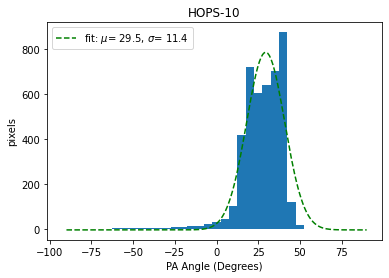

Std error [0.91018458 1.06655317]


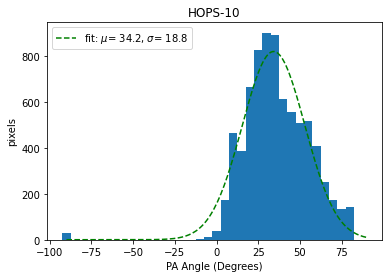

In [58]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
plt.figure()
plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,PA,outputb[0],p0=[300,25,20,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-10")
plt.savefig("HOPS-10_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
plt.figure()
plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[300,25,20,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-10")
plt.savefig("HOPS-10_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

In [59]:
print(C)

[[-4.39960358  0.36227226]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


# HOPS-11

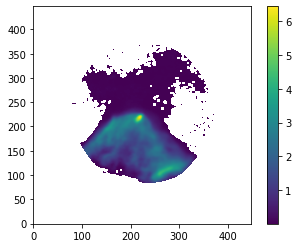

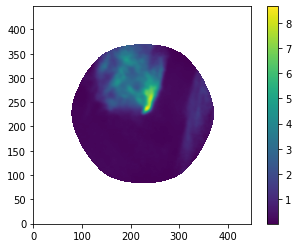

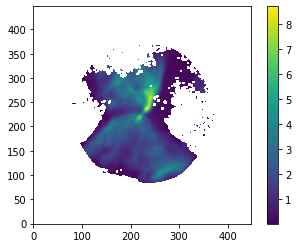

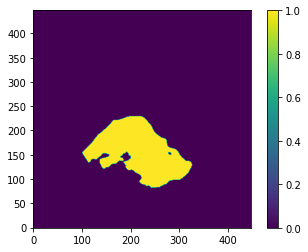

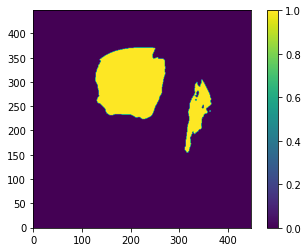

In [60]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS11_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS11_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.9,1.0,0.0 )
maskr = np.where(image_datar > 0.9,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

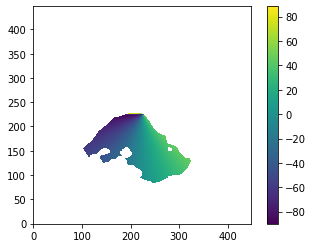

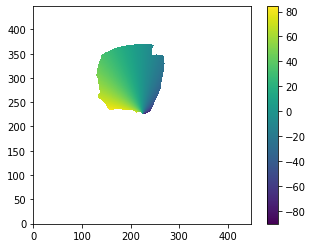

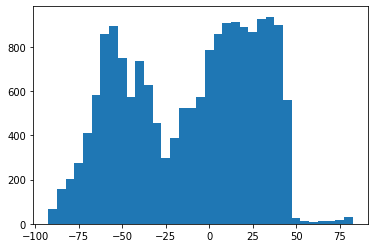

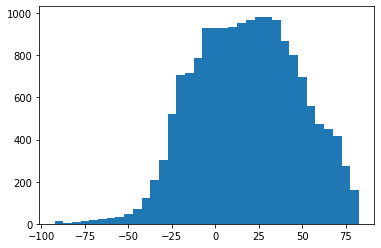

Std error [1.63680726 7.12169359]


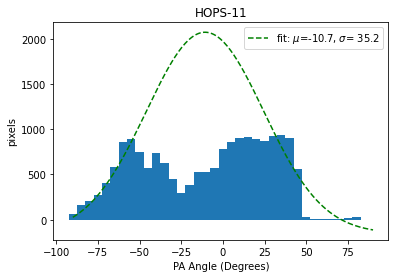

Std error [0.86687272 1.50979055]


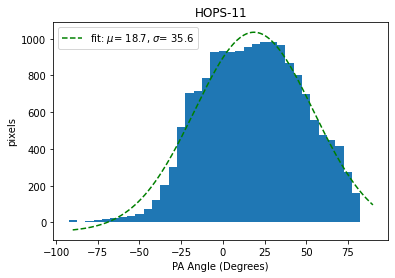

In [61]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[250:,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[:225,:] =np.nan
R[:,300:] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)
outputb = plt.hist(B.flatten(),bins=binrange)
plt.show()
outputr = plt.hist(R.flatten(),bins=binrange)
plt.show()

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
plt.figure()
outputb = plt.hist(B.flatten(),bins=binrange)
target_func = gaussian

outputb_select = np.r_[outputb[0][:9],outputb[0][-10:]]
PA_select = np.r_[PA[:9],PA[-10:]]

popt, pcov = curve_fit(target_func,PA_select,outputb_select,p0=[300,15,50,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-11")
plt.savefig("HOPS-11_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()
#plt.scatter(np.linspace(1,len(outputb[0]),len(outputb[0])),outputb[0])
#plt.show()

count = 1
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
plt.figure()
outputr = plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[300,25,20,1f], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-11")
plt.savefig("HOPS-11_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS164

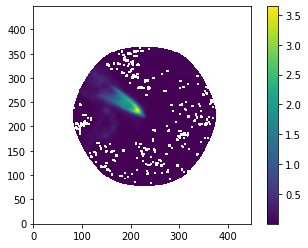

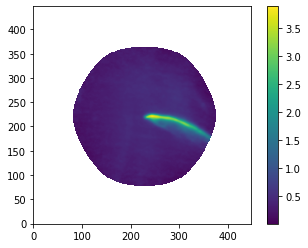

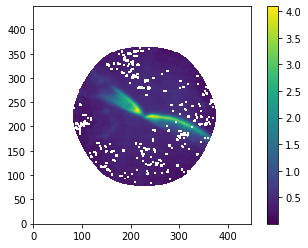

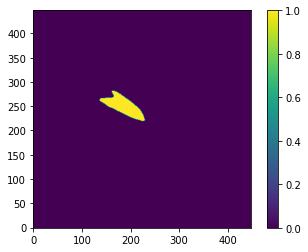

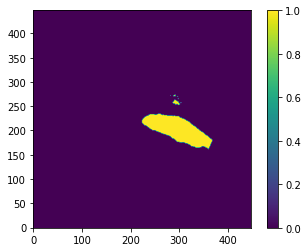

In [62]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS164_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS164_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.56,1.0,0.0 )
maskr = np.where(image_datar > 0.56,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

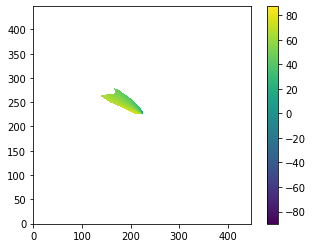

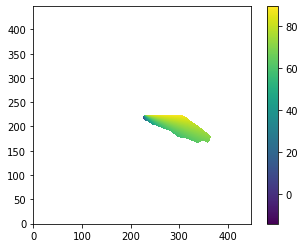

Std error [0.79408561 0.89262922]


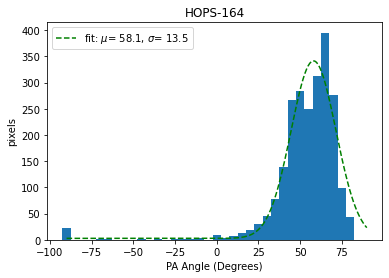

Std error [0.12663309 0.14544277]


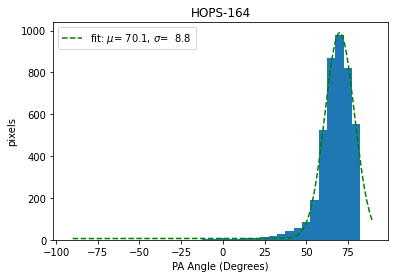

In [63]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:225,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[225:,:] =np.nan
#R[:,300:] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)
#outputb = plt.hist(B.flatten(),bins=binrange)
#plt.show()
#outputr = plt.hist(R.flatten(),bins=binrange)
#plt.show()

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
plt.figure()
outputb = plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,PA,outputb[0],p0=[300,25,20,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-164")
plt.savefig("HOPS-164_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 2
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
plt.figure()
outputr = plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[300,25,20,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-164")
plt.savefig("HOPS-164_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS-169

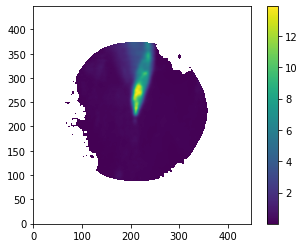

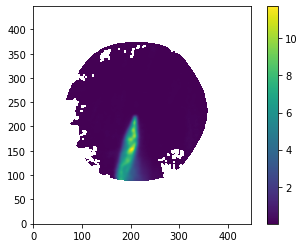

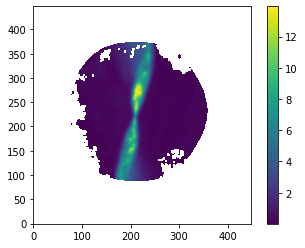

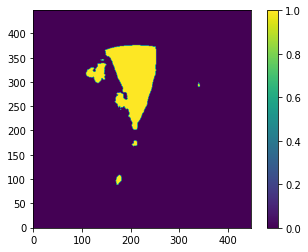

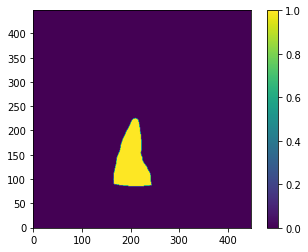

In [64]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS169_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS169_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.4,1.0,0.0 )
maskr = np.where(image_datar > 0.4,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

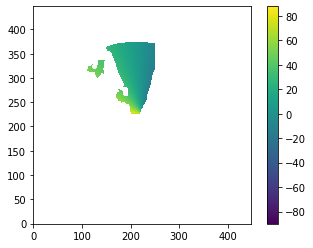

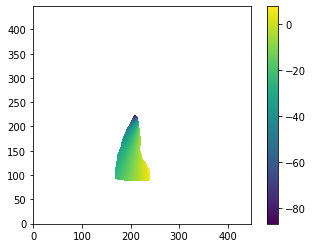

Std error [1.43693147 1.77537304]


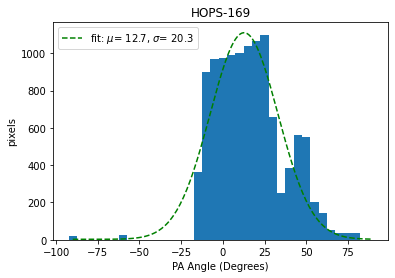

Std error [0.44336882 0.49325631]


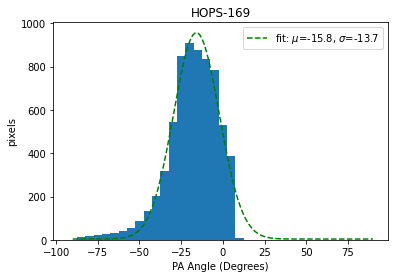

In [65]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:225,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[225:,:] =np.nan
#R[:,300:] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
plt.figure()
outputb = plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,PA,outputb[0],p0=[300,25,20,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-169")
plt.savefig("HOPS-169_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 3
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
plt.figure()
outputr = plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[300,25,20,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-169")
plt.savefig("HOPS-169_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()
OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS-198

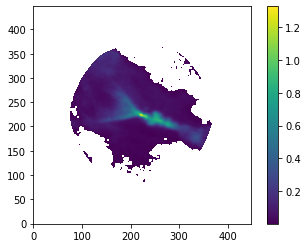

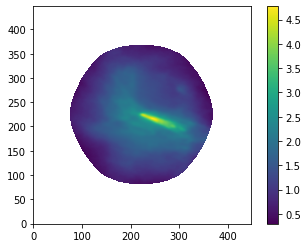

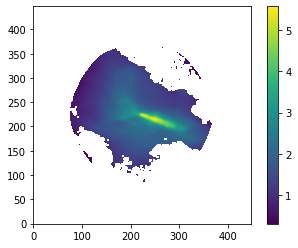

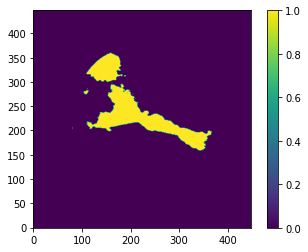

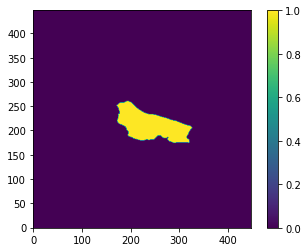

In [66]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS198_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS198_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.1,1.0,0.0 )
maskr = np.where(image_datar > 2.0,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [67]:
print(PA)
PA2 = np.arange(-90,260,5)
print(PA2)
print(len(PA),len(PA2))

[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255]
35 70


## maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:,255:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
R[:,:255] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:27],PA2[37:-16]],np.r_[outputb[0][20:27],outputb[0][2:-16]],p0=[300,75,20,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-198")
plt.savefig("HOPS-198_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 4
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-198")
plt.savefig("HOPS-198_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS355

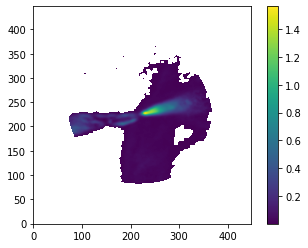

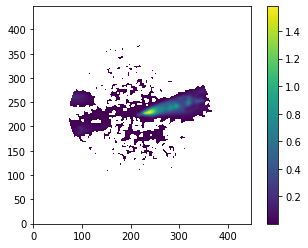

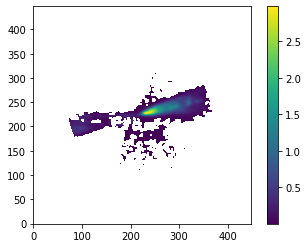

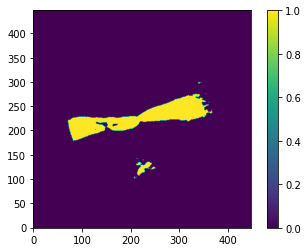

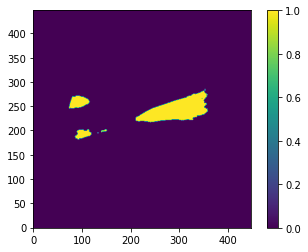

In [69]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS355_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS355_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.05,1.0,0.0 )
maskr = np.where(image_datar > 0.05,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

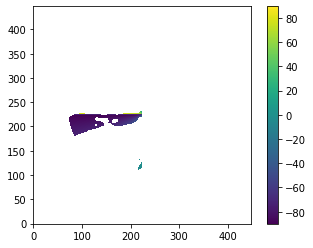

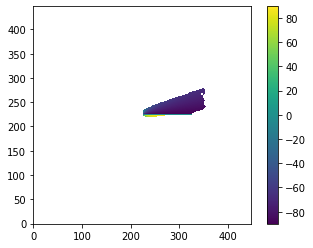

Std error [0.36928772 0.387071  ]


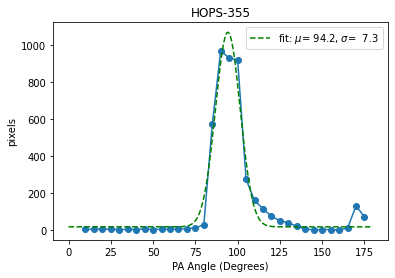

Std error [0.42591449 0.4584289 ]


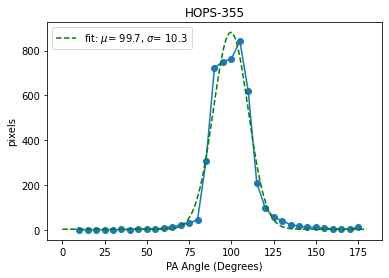

In [70]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:22],PA2[22:-16]],np.r_[outputb[0][20:],outputb[0][:-16]],p0=[300,75,20,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-355")
plt.savefig("HOPS-355_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 5
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-355")
plt.savefig("HOPS-355_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS408

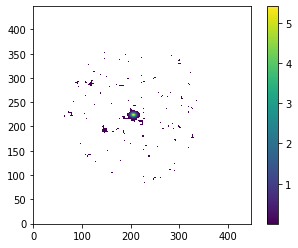

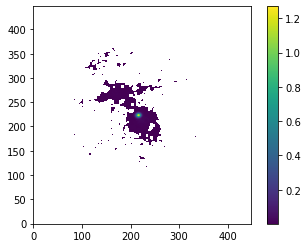

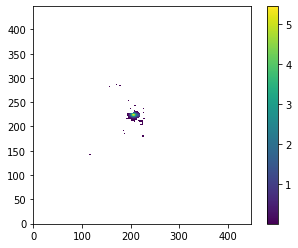

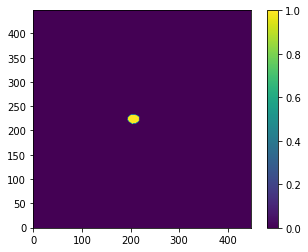

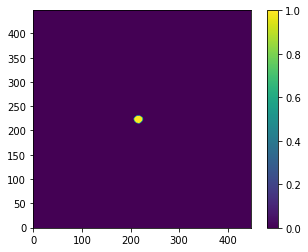

In [71]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS408_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class0/outflows/HOPS408_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.05,1.0,0.0 )
maskr = np.where(image_datar > 0.05,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

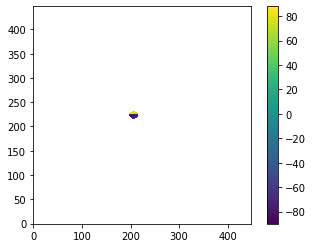

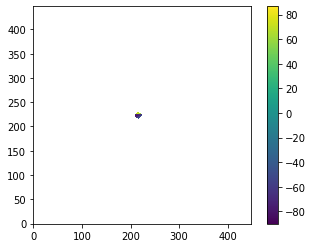

Std error [0.59541647 0.69618106]


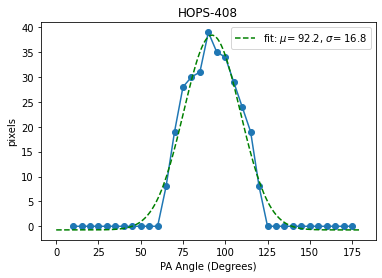

Std error [1.18330511 2.13210822]


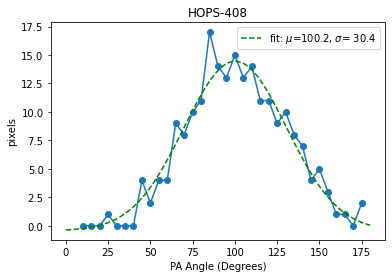

In [72]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:22],PA2[22:-16]],np.r_[outputb[0][20:],outputb[0][:-16]],p0=[300,75,20,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-408")
plt.savefig("HOPS-408_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 6
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-408")
plt.savefig("HOPS-408_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# Class 1 sources

# HOPS-127

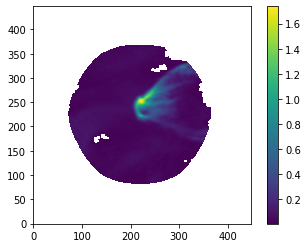

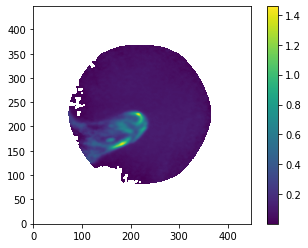

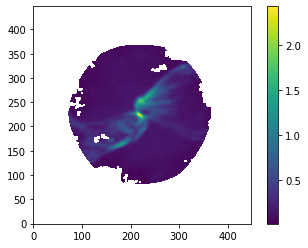

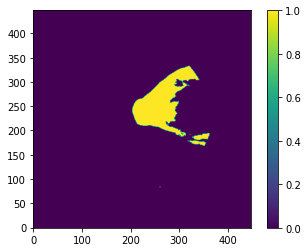

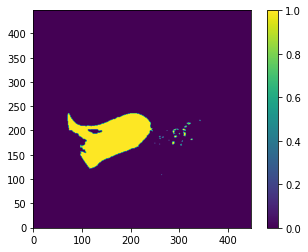

In [73]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS127_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS127_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.12,1.0,0.0 )
maskr = np.where(image_datar > 0.12,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

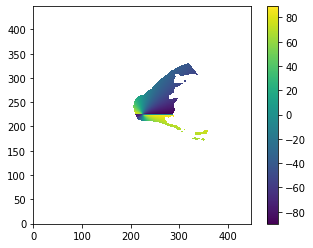

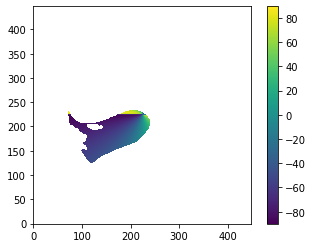

Std error [1.0949726 1.6700284]


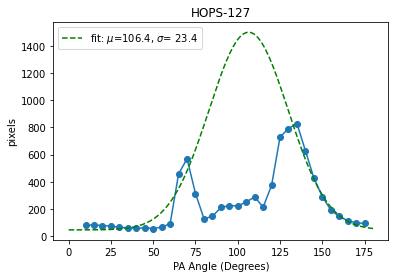

Std error [1.06460493 1.28891495]


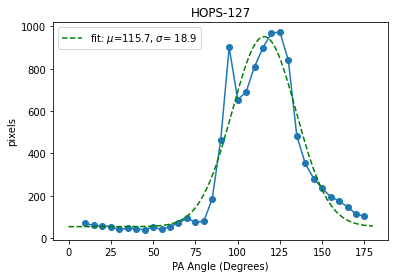

In [74]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:33],PA2[44:-16]],np.r_[outputb[0][20:33],outputb[0][9:-16]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-127")
plt.savefig("HOPS-127_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 7
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-127")
plt.savefig("HOPS-127_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS130

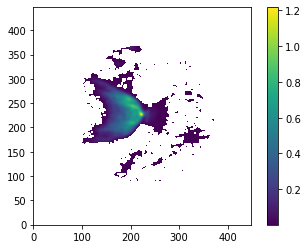

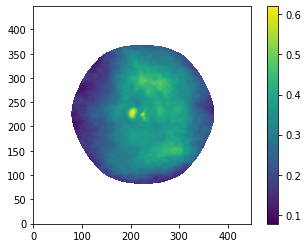

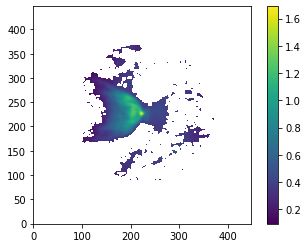

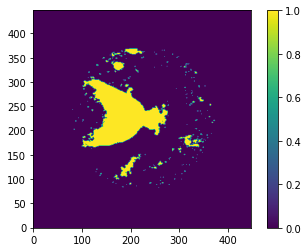

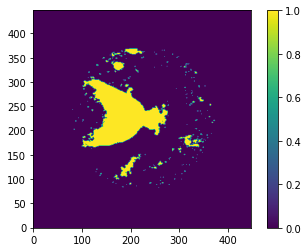

In [75]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS130_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS130_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.01,1.0,0.0 )
maskr = np.where(image_datab > 0.01,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

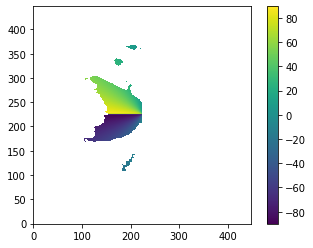

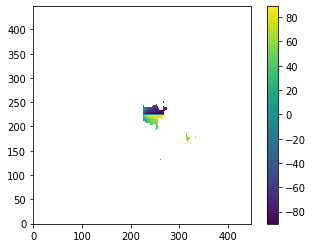

Std error [1.26063625 2.4287415 ]


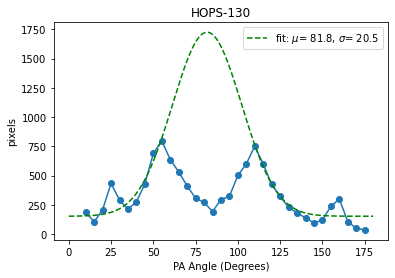

Std error [1.21768777 1.5223111 ]


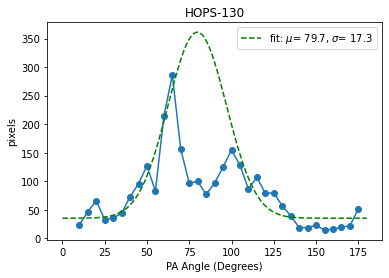

In [76]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:30],PA2[41:-16]],np.r_[outputb[0][20:30],outputb[0][6:-16]],p0=[300,80,50,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-130")
plt.savefig("HOPS-130_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 8
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:32],PA2[39:-16]],np.r_[outputr[0][20:32],outputr[0][4:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-130")
plt.savefig("HOPS-130_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS135

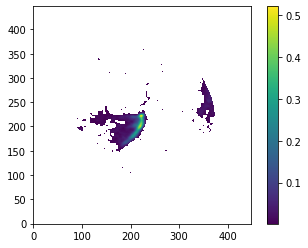

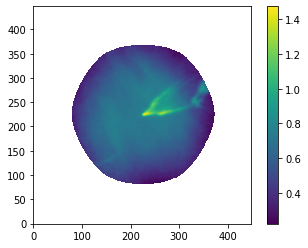

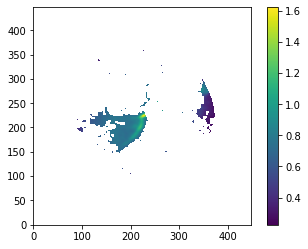

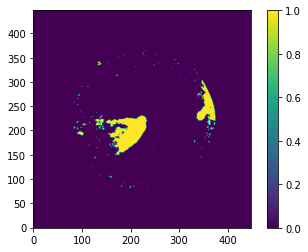

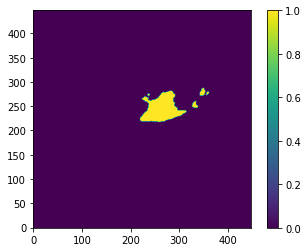

In [77]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS135_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS135_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.01,1.0,0.0 )
maskr = np.where(image_datar > 0.77,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

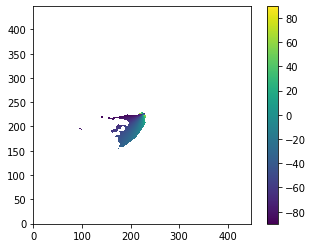

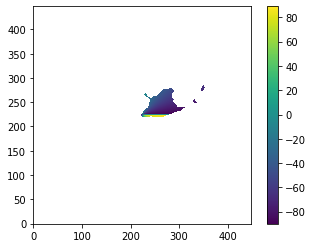

Std error [2.31180406 3.60600137]


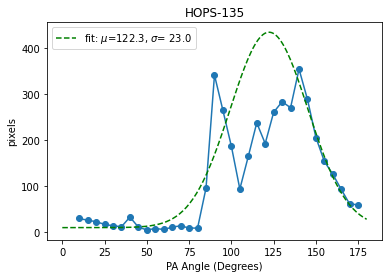

Std error [1.24091007 1.58598021]


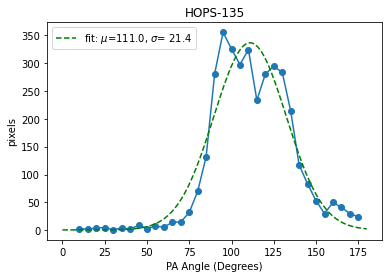

In [78]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:,300:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:39],PA2[49:-16]],np.r_[outputb[0][20:],outputb[0][:4],outputb[0][14:-16]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-135")
plt.savefig("HOPS-135_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 9
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-135")
plt.savefig("HOPS-135_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS-157

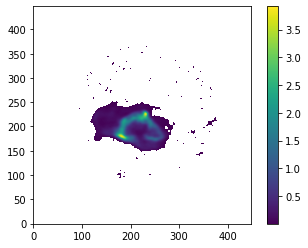

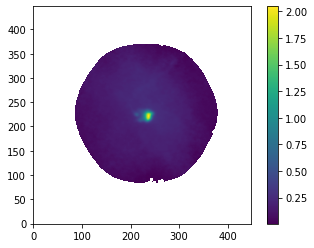

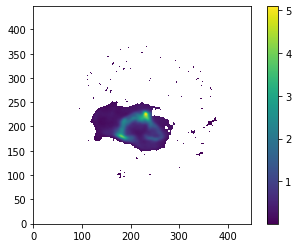

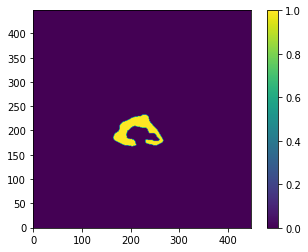

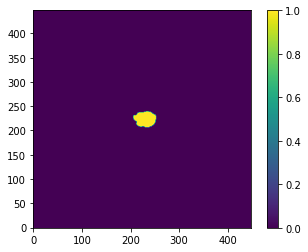

In [79]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS157_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS157_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.7,1.0,0.0 )
maskr = np.where(image_datar > 0.3,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [80]:
print(len(outputb[0]))

35


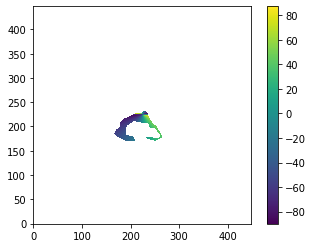

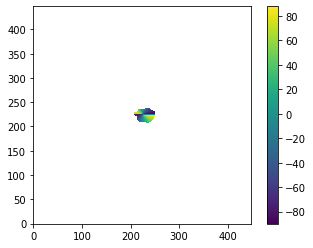

Std error [1.00108002 3.30015484]


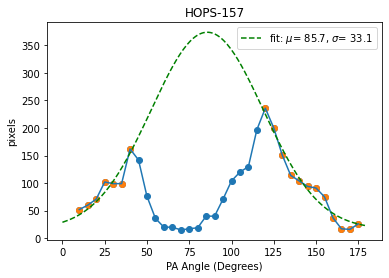

Std error [1.53288759 2.42437842]


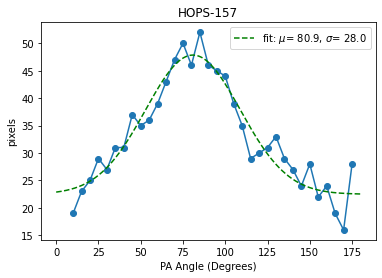

In [81]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[:,300:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,np.r_[PA2[20:38],PA2[38:-16]],np.r_[outputb[0][20:],outputb[0][:-16]],p0=[300,100,50,1], maxfev=100000)
popt, pcov = curve_fit(target_func,np.r_[PA2[20:27],PA2[42:-16]],np.r_[outputb[0][20:27],outputb[0][7:-16]],p0=[300,75,50,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.scatter(np.r_[PA2[20:27],PA2[42:-16]],np.r_[outputb[0][20:27],outputb[0][7:-16]])

plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-157")
plt.savefig("HOPS-157_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 10
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-157")
plt.savefig("HOPS-157_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS177

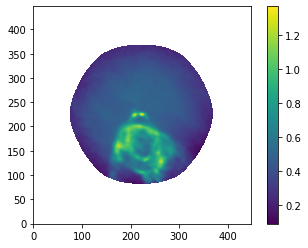

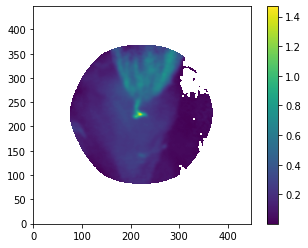

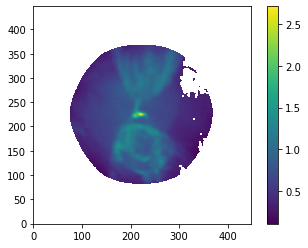

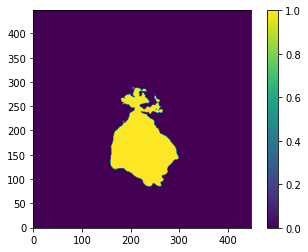

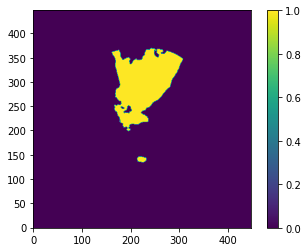

In [82]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS177_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS177_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.5,1.0,0.0 )
maskr = np.where(image_datar > 0.3,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

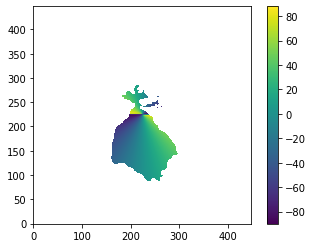

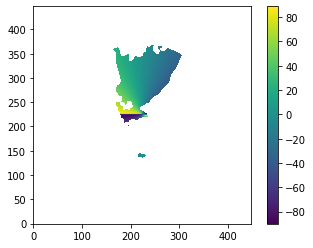

Std error [1.75288874 5.71027334]


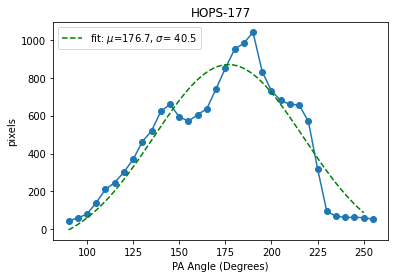

Std error [2.24601994 3.61467411]


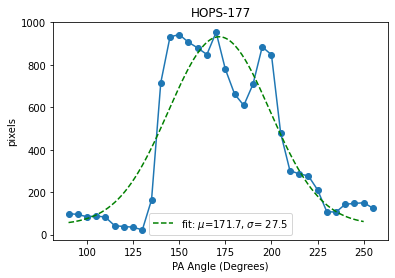

In [83]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(90,250,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[36:37],PA2[37:]],np.r_[outputb[0][35:],outputb[0][1:]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[36:],np.r_[outputb[0][35:],outputb[0][1:]])
plt.plot(PA2[36:],np.r_[outputb[0][35:],outputb[0][1:]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-177")
plt.savefig("HOPS-177_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 11
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(90,250,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[36:37],PA2[37:]],np.r_[outputr[0][35:],outputr[0][1:]],p0=[300,200,40,1], maxfev=100000)
plt.scatter(PA2[36:],np.r_[outputr[0][35:],outputr[0][1:]])
plt.plot(PA2[36:],np.r_[outputr[0][35:],outputr[0][1:]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-177")
plt.savefig("HOPS-177_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS185

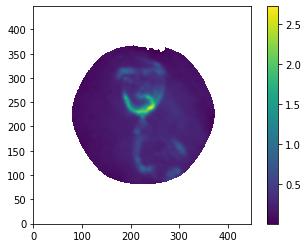

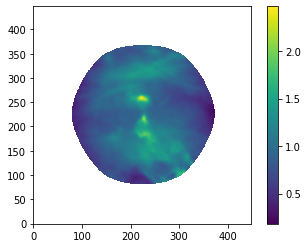

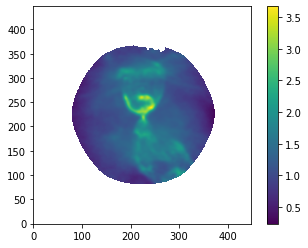

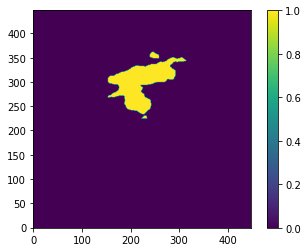

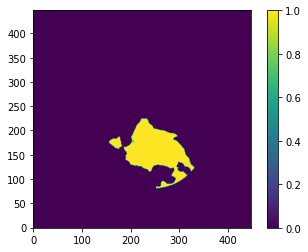

In [84]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS185_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS185_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

#maskb1 = np.where(image_datab > 0.25,1.0,0.0 )
maskr = np.where(image_datar > 1.1,1.0,0.0 )
maskb = np.where(image_datar > 1.1,1.0,0.0 )

maskr[225:,:] = 0
maskb[:225,:] = 0

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

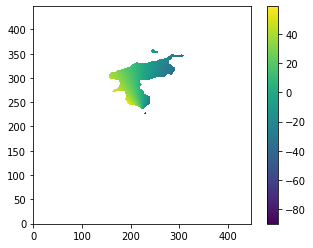

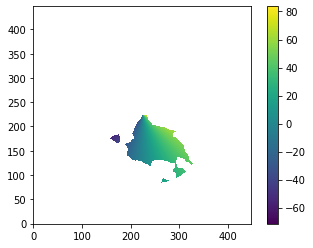

Std error [1.95316086 4.17772005]


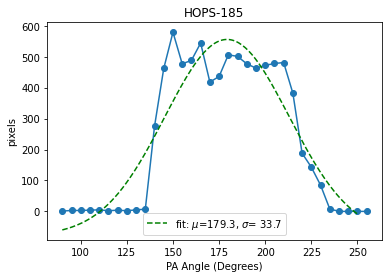

Std error [2.42153067 3.40485581]


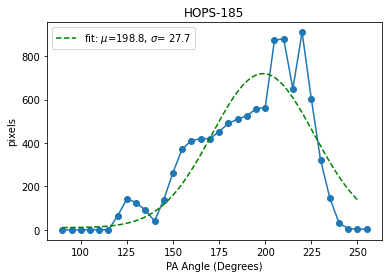

In [85]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(90,250,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[36:37],PA2[37:]],np.r_[outputb[0][35:],outputb[0][1:]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[36:],np.r_[outputb[0][35:],outputb[0][1:]])
plt.plot(PA2[36:],np.r_[outputb[0][35:],outputb[0][1:]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-185")
plt.savefig("HOPS-185_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 12
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(90,250,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[36:37],PA2[37:]],np.r_[outputr[0][35:],outputr[0][1:]],p0=[300,200,40,1], maxfev=100000)
plt.scatter(PA2[36:],np.r_[outputr[0][35:],outputr[0][1:]])
plt.plot(PA2[36:],np.r_[outputr[0][35:],outputr[0][1:]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-185")
plt.savefig("HOPS-185_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()
OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS191

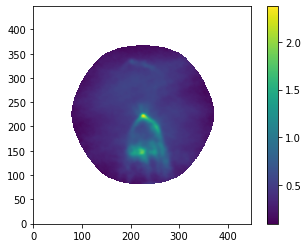

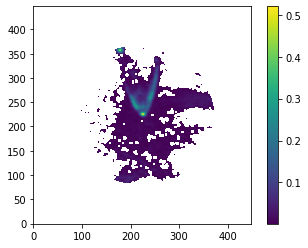

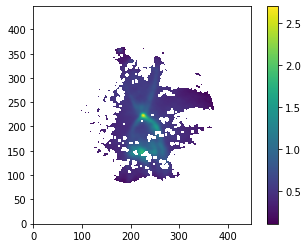

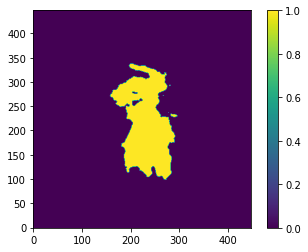

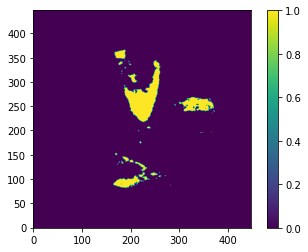

In [86]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS191_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Class1/outflows/HOPS191_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.5,1.0,0.0 )
maskr = np.where(image_datar > 0.022,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

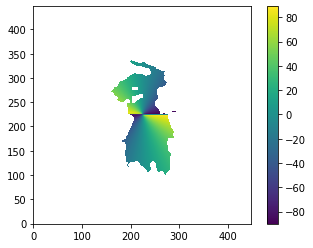

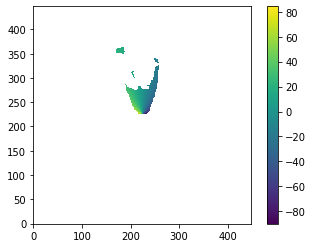

Std error [1.27614151 2.61460736]


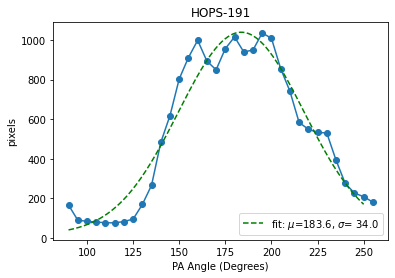

Std error [1.58356328 2.5608089 ]


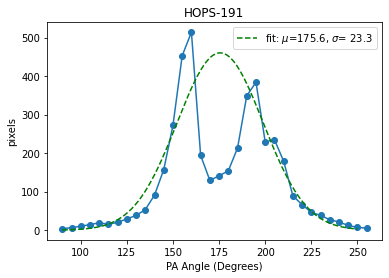

In [87]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[:225,:] =np.nan
R[:,300:] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(90,250,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[36:37],PA2[37:]],np.r_[outputb[0][35:],outputb[0][1:]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[36:],np.r_[outputb[0][35:],outputb[0][1:]])
plt.plot(PA2[36:],np.r_[outputb[0][35:],outputb[0][1:]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-191")
plt.savefig("HOPS-191_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 13
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(90,250,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[36:52],PA2[56:]],np.r_[outputr[0][35:],outputr[0][1:16],outputr[0][20:]],p0=[300,200,40,1], maxfev=100000)
plt.scatter(PA2[36:],np.r_[outputr[0][35:],outputr[0][1:]])
plt.plot(PA2[36:],np.r_[outputr[0][35:],outputr[0][1:]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-191")
plt.savefig("HOPS-191_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# Flat source

# HOPS129

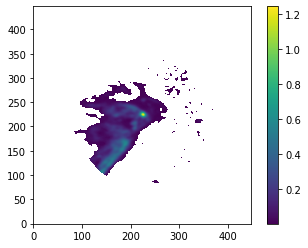

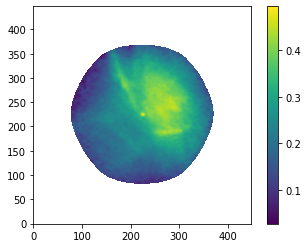

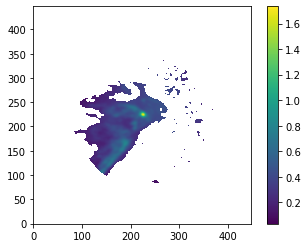

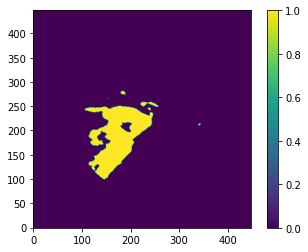

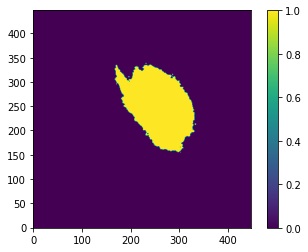

In [88]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS129_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS129_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.05,1.0,0.0 )
maskr = np.where(image_datar > 0.3,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

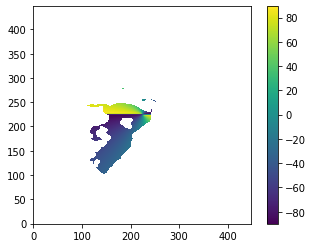

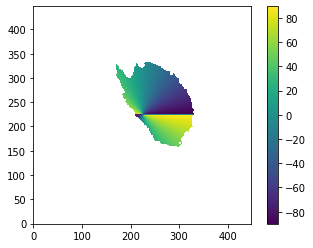

Std error [2.7203955  1.92131582]


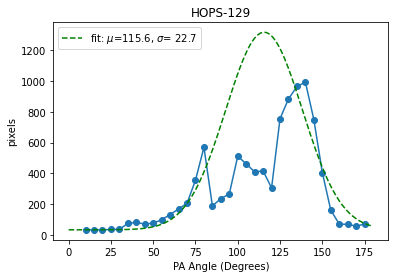

Std error [0.89970759 0.86550795]


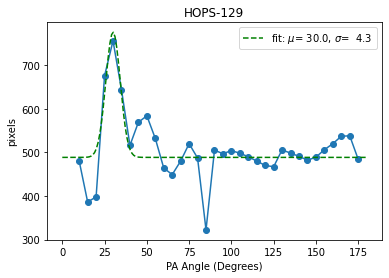

In [89]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:33],PA2[44:-16]],np.r_[outputb[0][20:33],outputb[0][9:-16]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-129")
plt.savefig("HOPS-129_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 14
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,25,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-129")
plt.savefig("HOPS-129_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS134

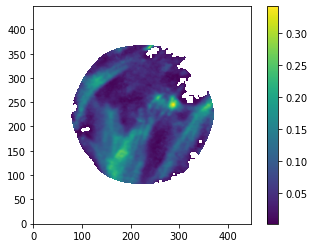

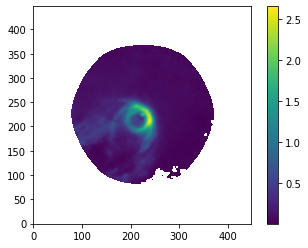

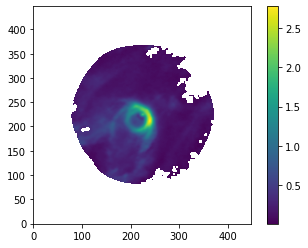

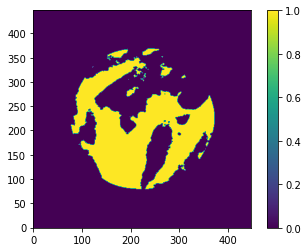

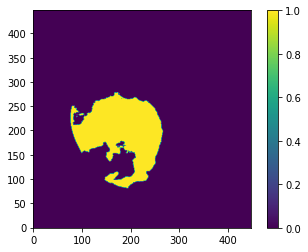

In [90]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS134_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS134_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.05,1.0,0.0 )
maskr = np.where(image_datar > 0.15,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

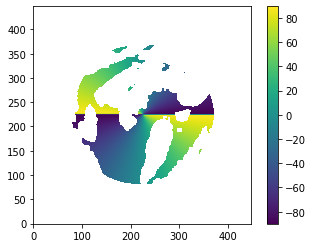

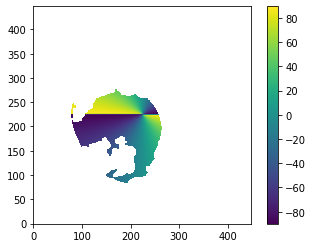

Std error [ 4.39794151 23.72982172]


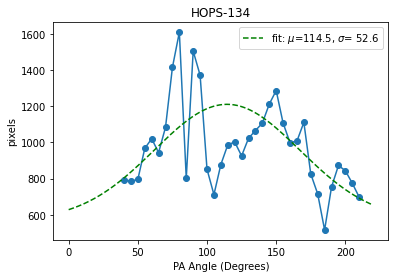

Std error [1.53554482 5.13139764]


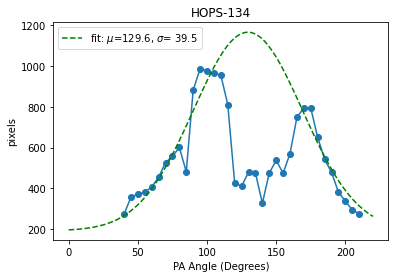

In [91]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,220,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[26:33],PA2[44:-9]],np.r_[outputb[0][26:33],outputb[0][9:-9]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[26:-9],np.r_[outputb[0][26:],outputb[0][:-9]])
plt.plot(PA2[26:-9],np.r_[outputb[0][26:],outputb[0][:-9]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-134")
plt.savefig("HOPS-134_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 15
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,220,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[26:41],PA2[52:-9]],np.r_[outputr[0][26:],outputr[0][:6],outputr[0][17:-9]],p0=[300,150,20,1], maxfev=100000)
plt.scatter(PA2[26:-9],np.r_[outputr[0][26:],outputr[0][:-9]])
plt.plot(PA2[26:-9],np.r_[outputr[0][26:],outputr[0][:-9]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-134")
plt.savefig("HOPS-134_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS13

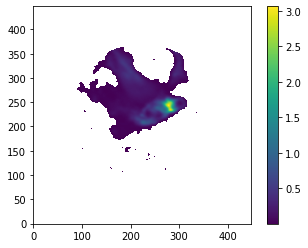

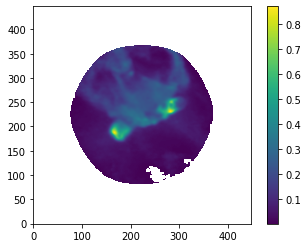

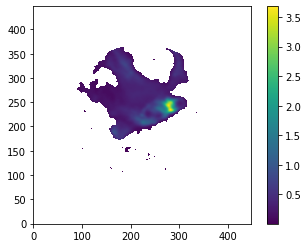

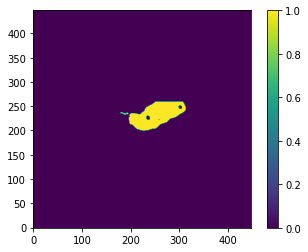

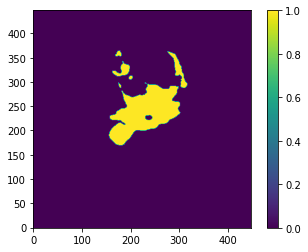

In [92]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS13_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS13_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.15,1.0,0.0 )
maskr = np.where(image_datar > 0.2,1.0,0.0 )

maskb[260:,:] = 0

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

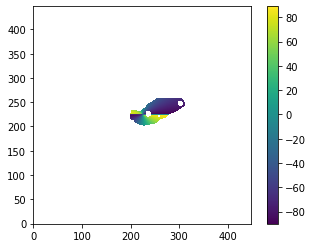

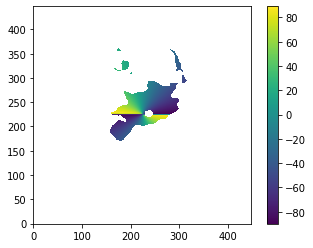

Std error [0.6477337  0.73272597]


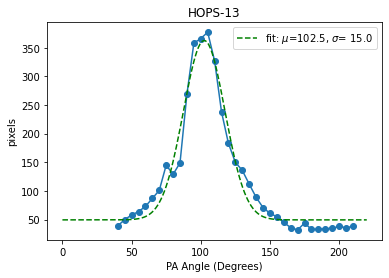

Std error [1.42573568 1.66905289]


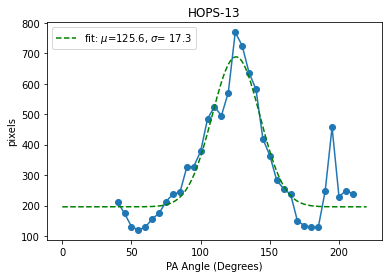

In [93]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,220,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[26:33],PA2[33:-9]],np.r_[outputb[0][26:],outputb[0][:-9]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[26:-9],np.r_[outputb[0][26:],outputb[0][:-9]])
plt.plot(PA2[26:-9],np.r_[outputb[0][26:],outputb[0][:-9]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-13")
plt.savefig("HOPS-13_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()
count = 16
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,220,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[26:41],PA2[41:-9]],np.r_[outputr[0][26:],outputr[0][:-9]],p0=[300,150,20,1], maxfev=100000)
plt.scatter(PA2[26:-9],np.r_[outputr[0][26:],outputr[0][:-9]])
plt.plot(PA2[26:-9],np.r_[outputr[0][26:],outputr[0][:-9]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-13")
plt.savefig("HOPS-13_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS150

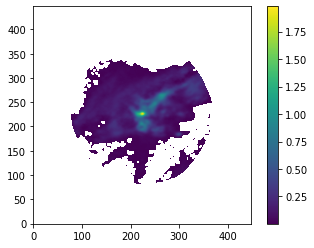

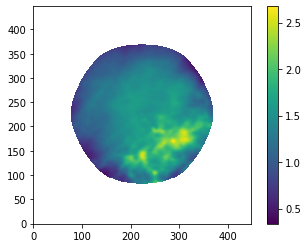

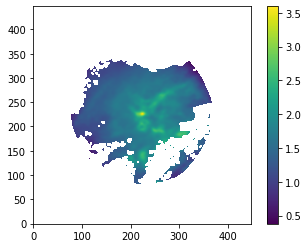

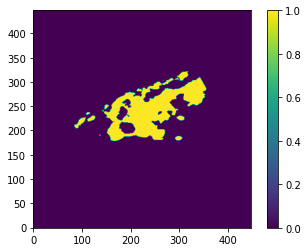

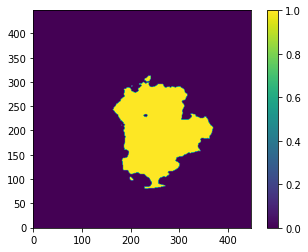

In [94]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS150_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS150_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.15,1.0,0.0 )
maskr = np.where(image_datar > 1.5,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

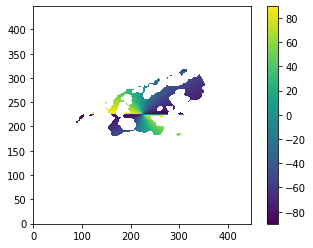

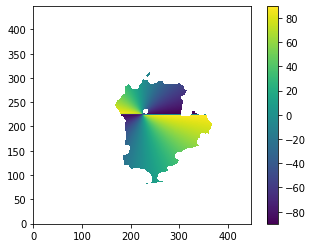

Std error [0.8440597  0.92875329]


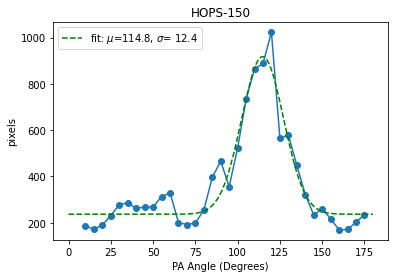

Std error [4.15456106 4.39235065]


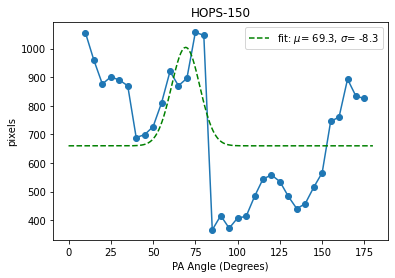

In [95]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,180,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:33],PA2[33:-16]],np.r_[outputb[0][20:],outputb[0][:-16]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputb[0][20:],outputb[0][:-16]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-150")
plt.savefig("HOPS-150_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()
count = 17
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,180,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[20:37],PA2[37:-16]],np.r_[outputr[0][20:],outputr[0][:-16]],p0=[300,75,20,1], maxfev=100000)
plt.scatter(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])
plt.plot(PA2[20:-16],np.r_[outputr[0][20:],outputr[0][:-16]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-150")
plt.savefig("HOPS-150_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()
OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS166

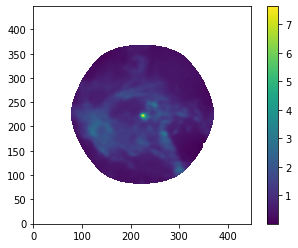

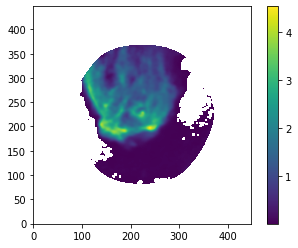

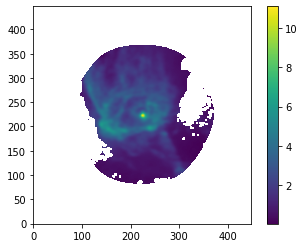

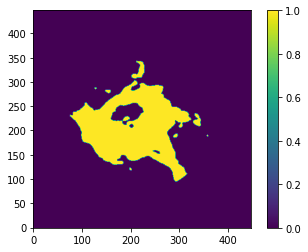

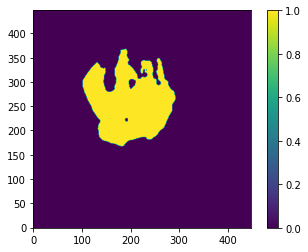

In [96]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS166_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS166_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.9,1.0,0.0 )
maskr = np.where(image_datar > 0.9,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

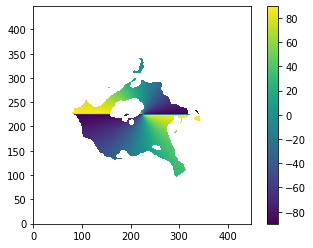

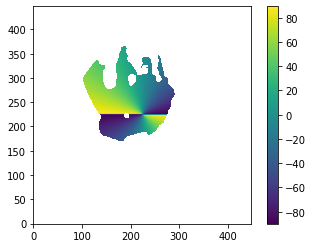

Std error [ 1.04700746 17.20784212]


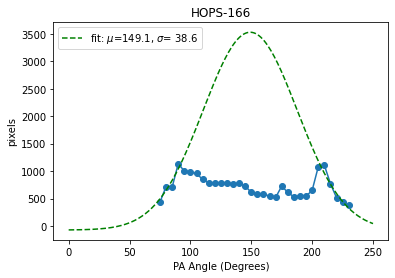

Std error [1.54850436 6.12246851]


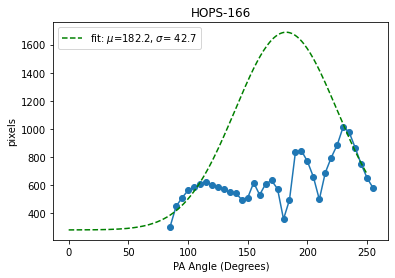

In [97]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,250,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[33:37],PA2[-11:-5]],np.r_[outputb[0][33:35],outputb[0][:2],outputb[0][-11:-5]],p0=[300,150,50,1], maxfev=100000)

plt.scatter(PA2[33:-5],np.r_[outputb[0][33:],outputb[0][:-5]])
plt.plot(PA2[33:-5],np.r_[outputb[0][33:],outputb[0][:-5]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-166")
plt.savefig("HOPS-166_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 18
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,250,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[35:42],PA2[-6:]],np.r_[outputr[0][:7],outputr[0][-6:]],p0=[300,150,50,1], maxfev=100000)
plt.scatter(PA2[35:],np.r_[outputr[0][35:],outputr[0][:]])
plt.plot(PA2[35:],np.r_[outputr[0][35:],outputr[0][:]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-166")
plt.savefig("HOPS-166_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()
OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS194

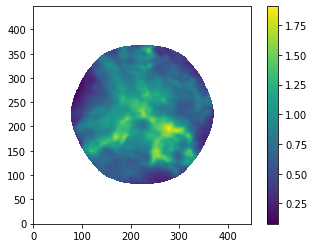

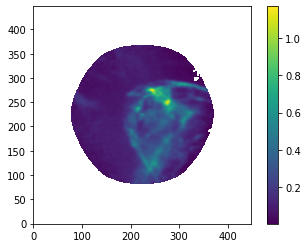

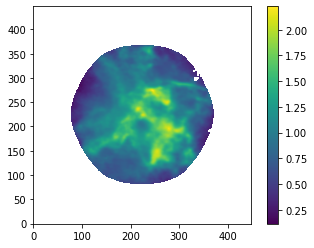

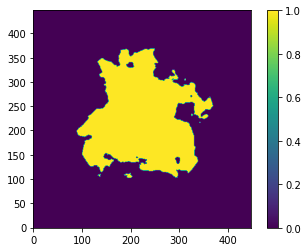

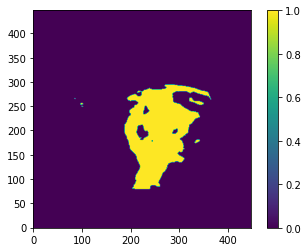

In [98]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS194_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS194_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.7,1.0,0.0 )
maskr = np.where(image_datar > 0.2,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

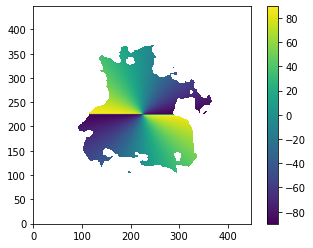

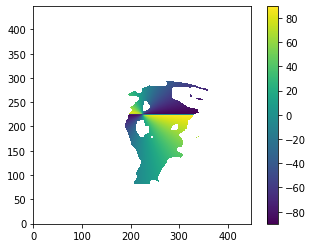

Std error [ 16.73283437 479.94652632]


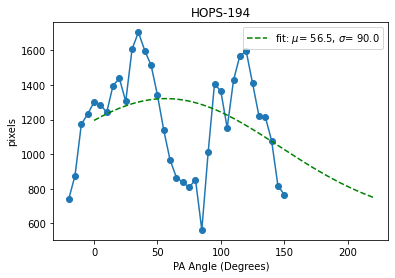

Std error [2.24177497 1.92076638]


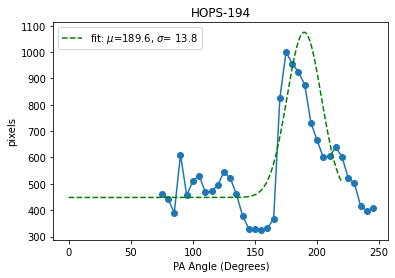

In [99]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,220,180)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[14:26],PA2[33:-21]],np.r_[outputb[0][14:26],outputb[0][33:],outputb[0][:-21]],p0=[300,130,70,1],bounds=(0,[1000,360,90,np.inf]), maxfev=100000)

plt.scatter(PA2[14:-21],np.r_[outputb[0][14:],outputb[0][:-21]])
plt.plot(PA2[14:-21],np.r_[outputb[0][14:],outputb[0][:-21]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-194")
plt.savefig("HOPS-194_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 19
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]

#RED
x = np.linspace(-0,220,180)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[33:56],PA2[-10:-2]],np.r_[outputr[0][33:],outputr[0][:21],outputr[0][-10:-2]],p0=[300,150,20,1], maxfev=100000)
plt.scatter(PA2[33:-2],np.r_[outputr[0][33:],outputr[0][:-2]])
plt.plot(PA2[33:-2],np.r_[outputr[0][33:],outputr[0][:-2]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-194")
plt.savefig("HOPS-194_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

# HOPS200

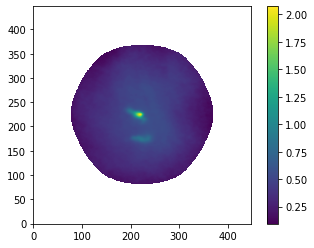

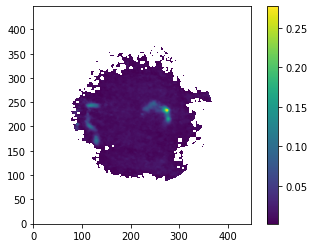

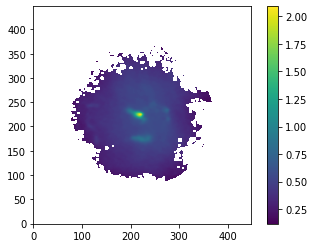

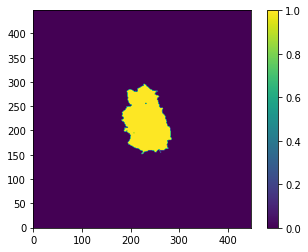

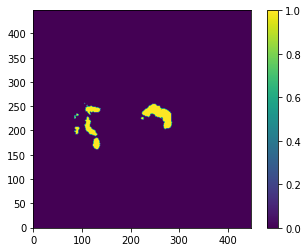

In [100]:
image_file_b = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS200_CO_Moment0_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/netc/arce/ch963/Orion_A_sources/ALL_fits/ALL_masked_fits/Flat_source/outflows/HOPS200_CO_Moment0_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.5,1.0,0.0 )
maskr = np.where(image_datar > 0.03,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

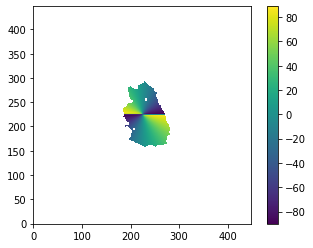

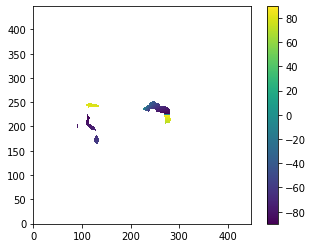

Std error [1.46949306 6.20916637]


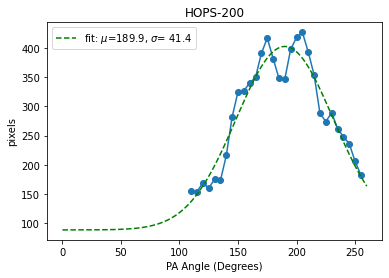

Std error [1.91595395 2.27521114]


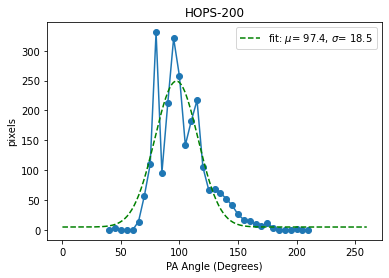

In [101]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[:,225:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
#R[:,:225] =np.nan

plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

binrange = np.arange(-92.5,87.5,5)

from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUE
x = np.linspace(-0,260,260)
plt.figure()
outputb = np.histogram(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[40:50],PA2[50:]],np.r_[outputb[0][35:],outputb[0][5:]],p0=[300,130,50,1], maxfev=100000)

plt.scatter(PA2[40:],np.r_[outputb[0][35:],outputb[0][5:]])
plt.plot(PA2[40:],np.r_[outputb[0][35:],outputb[0][5:]])
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-200")
plt.savefig("HOPS-200_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 20
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
x = np.linspace(-0,260,260)
plt.figure()
outputr = np.histogram(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,np.r_[PA2[26:41],PA2[41:-9]],np.r_[outputr[0][26:],outputr[0][:-9]],p0=[300,100,20,1], maxfev=100000)
plt.scatter(PA2[26:-9],np.r_[outputr[0][26:],outputr[0][:-9]])
plt.plot(PA2[26:-9],np.r_[outputr[0][26:],outputr[0][:-9]])      
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("HOPS-200")
plt.savefig("HOPS-200_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

In [102]:
from astropy.table import QTable

In [103]:
Name = ['HOPS10','HOPS11','HOPS164','HOPS169','HOPS198','HOPS355','HOPS408','HOPS127','HOPS130','HOP135'
       ,'HOPS157','HOPS177','HOPS185','HOPS191','HOPS129','HOPS134','HOPS13','HOPS150','HOPS166','HOPS194'
       ,'HOPS200']
print(len(Name))
TB = [46.2,48.8,50,32.5,61.4,44.9,37.9,
      133.3,156.7,130.3,77.6,84.7,96.9,196.7,
      191.3,781.9,383.6,245.2,457.1,645,244.4]
print(len(TB))

21
21


In [104]:
Outflows = QTable([Name,TB,OAb,OAr,X_OAb,X_OAr],
                  names=('Name','TB','B','R','X_B','X_R'),
                  meta={'name': 'outflow angular profile table'})

In [105]:
Outflows

Name,TB,B [36],R [36],X_B [36],X_R [36]
str7,float64,float64,float64,float64,float64
HOPS10,46.2,0.0 .. 0.0,30.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS11,48.8,67.0 .. 0.0,12.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS164,50.0,23.0 .. 0.0,0.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS169,32.5,21.0 .. 0.0,0.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS198,61.4,266.0 .. 0.0,39.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS355,44.9,571.0 .. 0.0,308.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS408,37.9,31.0 .. 0.0,17.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS127,133.3,145.0 .. 0.0,187.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0
HOPS130,156.7,192.0 .. 0.0,77.0 .. 0.0,-90.0 .. 0.0,-90.0 .. 0.0


In [106]:
Outflows.write('OrionA_outflow_opening_angle.fits', overwrite=True)

In [107]:
Outflow_fit = QTable([Name,TB,A,Mu,Sig,C,Mu_err,Sig_err],
                  names=('Name','TB','A','Mu','Sig','C','Err_Mu','Err_Sig'),
                  meta={'name': 'outflow opening angle fit table'})

In [108]:
Outflow_fit

Name,TB,A [2],Mu [2],Sig [2],C [2],Err_Mu [2],Err_Sig [2]
str7,float64,float64,float64,float64,float64,float64,float64
HOPS10,46.2,789.4632708214245 .. 820.7770432742407,29.452600898928605 .. 34.19982772149619,11.412939092039103 .. 18.792735858841418,-4.399603575981884 .. 0.36227226216809444,0.9412293865564145 .. 0.9101845809550945,1.0211112959104094 .. 1.0665531708877063
HOPS11,48.8,2221.4840927202567 .. 1085.796590481544,-10.729557205651671 .. 18.687013831984626,35.22549277501899 .. 35.62966078948078,-150.3987255018917 .. -50.73631074450246,1.6368072569180985 .. 0.8668727229743843,7.121693594152812 .. 1.509790550468432
HOPS164,50.0,338.65159621558917 .. 984.141888386218,58.071458504769176 .. 70.07137761581842,13.468423996440796 .. 8.842543545051011,2.750691273034371 .. 6.021713877957841,0.7940856074007422 .. 0.1266330883621114,0.8926292214422541 .. 0.14544276972584694
HOPS169,32.5,1107.3165662772155 .. 953.3925335079684,12.715423540540568 .. -15.835301910829418,20.338028497535092 .. -13.699469700851724,2.6032488784965264 .. 3.4628456007172503,1.4369314708663297 .. 0.4433688210717305,1.7753730434799206 .. 0.4932563082579381
HOPS198,61.4,1744.0648518774617 .. 458.24596198987643,60.54566332702542 .. 67.59255691149353,21.004997603512717 .. 11.54389902793814,-4.7529269590134575 .. -4.0877945934369855,1.1251080472175643 .. 0.6118969577979757,1.351804792204609 .. 0.6670464473142981
HOPS355,44.9,1052.599517977017 .. 877.579758997903,94.21335436842891 .. 99.65428075428386,7.300052131414837 .. 10.303158903672285,17.670526860455375 .. 4.12034323541543,0.36928771902762597 .. 0.42591448835456375,0.3870710008270768 .. 0.45842890238642836
HOPS408,37.9,39.15058474686229 .. 14.872452138501204,92.15960236018375 .. 100.23129466469082,16.756849886920953 .. 30.432372179743204,-0.7320529953356864 .. -0.42329394389749936,0.5954164736557942 .. 1.183305106355431,0.6961810640248086 .. 2.1321082173402073
HOPS127,133.3,1454.7528427801296 .. 897.0955234194643,106.41280018745968 .. 115.66523584409472,23.4045032111148 .. 18.920524979121417,46.07951637427148 .. 54.446870330912176,1.0949726039790888 .. 1.064604925973607,1.6700283952185129 .. 1.2889149547708103
HOPS130,156.7,1573.8724406821311 .. 325.51255356111506,81.79182272554925 .. 79.74467801778438,20.469326977768613 .. 17.27557327739247,151.98007320035745 .. 35.492163109399506,1.2606362469813237 .. 1.217687773472059,2.428741503404553 .. 1.5223110979622931


In [109]:
print(Outflow_fit['A'][0])

[789.46327082 820.77704327]


In [110]:
Outflow_fit.write('OrionA_outflow_opening_angle_gausfit.fits', overwrite=True)